# Linearer Speicher

## Inhalte
1. Linearer Speicher
2. Auslaufen des Linearen Speichers

## 1. Linearer Speicher

Beim linearen Speicher handelt es sich um ein Modell für z.B. ein Gebirge, in dem der Abfluss A aus einem Speicher mit dem Volumen V proportional zum Zufluss Z ist. Die Proportionalitätskonstante ist der Auslauf- oder Speicherkoeffizient k.

$ A_i = k V_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from PIL import Image
from IPython.display import display


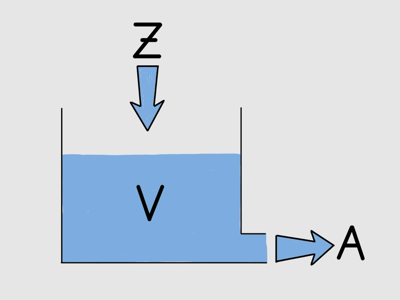

In [2]:
LS_jpg = Image.open('LinearerSpeicher.jpg')
LS_jpg_resize = LS_jpg.resize((400,300))
display(LS_jpg_resize)


In [3]:
# Definition einiger Eingangsgrößen
## Mittels interactiver Widgets, sodass diese vom Benutzer definiert/verändert werden können.

## Ein Auswahlfeld für den Speicherkoeffizienten k
Speicherkoeffizient = widgets.BoundedFloatText(value=0.1, min=0, max=1, step=0.1, description='Speicherkoeffizient (k)')
display(Speicherkoeffizient)

## Die Anzahl der zu berechnenden Zeitschritte
timesteps = widgets.BoundedIntText(value=30, min=0, max=100, step=1, description='Anzahl der Zeitschritte')
display(timesteps)

## Beginn und Ende der Zuflussperiode.
influx_t = widgets.IntRangeSlider(value=[0,10], min=0, max=100, step=1, descrption='Zuflusszeitspanne:')
display(influx_t)
## Menge des zufließenden Wassers
influx = widgets.BoundedFloatText(value=10, min=0, max=100, step=0.1, description='Zuflussvolumen:')
display(influx)
## Initiale Wassermenge im Speicher
initial_v = widgets.BoundedFloatText(value=10, min=0, max=100, step=0.1, description='Speichervolumen für t=0:')
display(initial_v)


BoundedFloatText(value=0.1, description='Speicherkoeffizient (k)', max=1.0, step=0.1)

BoundedIntText(value=30, description='Anzahl der Zeitschritte')

IntRangeSlider(value=(0, 10))

BoundedFloatText(value=10.0, description='Zuflussvolumen:', step=0.1)

BoundedFloatText(value=10.0, description='Speichervolumen für t=0:', step=0.1)

In [10]:
# Diese Funktion dient der Berechnung der gefragten Daten

def generate_data(k= Speicherkoeffizient, influx_vol=influx):
    '''
    input:
        k...Speicherkoeffizient [1/t], type = int
        influx_vol...Zuflussvoumen [L^3], type = int 
    --------------------------------------------------
    output:
        i...Zeitschritte, type = array
        A...Abfluss [L^3/t], type = array
        V...Im Speicher vorliegendes Wasservolumen [L^3], type = array
        Z...Zufluss [L^3/t], type = array
    '''
    # Hier werden die oben durch die Widgets festgelegten Werte (values) in Variablen gespeichert.
    datalenght=timesteps.value-1
    influx_time=influx_t.value
    initial_vol=initial_v.value

    # Ein Array für die Zeitschritte 
    i = np.arange(datalenght)
    # Ein Array für den Zufluss (Alternativ könnte man in Z auch Messdaten aus z.B. einer csv-Datei einlesen)
    Z = np.zeros_like(i, dtype=float)
    influx_start=influx_time[0]
    influx_end=influx_time[1]
    Z[influx_start:influx_end] = influx_vol
    # Arrays für Speichervolumen und Abfluss
    V = np.zeros_like(i, dtype=float)
    V[0] = initial_vol

    A = np.zeros_like(i, dtype=float)
    
    ## Befüllen der arrays mit Werten
    for n in range(1, len(i)):
        A[n-1] = V[n-1] * k
        V[n] = V[n-1] - A[n-1] + Z[n]
    
    return i, A, V, Z # Ausgabe der Ergebnisse (als arrays der selben länge)


In [11]:
# Diese Funktion dient dem Plotten der in generate_data() berechneten Daten

def plotting(k=Speicherkoeffizient, influx_vol=influx):
    ''' 
    input:
        k...Speicherkoeffizient [1/t], type = int
        influx_vol...Zuflussvoumen [L^3], type = int
    output:
        Plot für Zufluss, Speichervolumen und Abfluss gegen die Zeitschritte, entsprechend der Berechnungen aus generate_data()
    '''
    
    # Die Funktion generate_data() wird aufgerufen, um die Berechnungen werden in i, A, V und Z gespeichert.
    i, A, V, Z = generate_data(k, influx_vol)

    # Plotten der Daten
    fig, ax1 = plt.subplots() # Erste y-Achse für Speichervolumen
    ax1.plot(i, V, color = 'steelblue', label = 'Speichervolumen')
    ax1.set_xlabel('timesteps [t]')
    ax1.set_ylabel('Speichervolumen [L^3]')
    ax1.set_ylim(0,180)
    ax1.grid('True')
    ax1.margins(x=0, y=0) # Plot beginnt im Ursprung beginnt
    ax1.spines['top'].set_visible(False) # Oberer Rahmen wird ausgeblendet

    ax2 = ax1.twinx() # Zweite y-Achse für Zufluss und Abfluss
    ax2.plot(i, Z, color='skyblue', label = 'Zufluss')
    ax2.plot(i, A, color = 'navy', label = 'Abfluss')
    ax2.set_ylabel('Flux [L^3/t]')
    ax2.set_ylim(0,60)
    ax2.spines['top'].set_visible(False)

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes) # Eine Legende für beide Achsen
    plt.title('Linearer Speicher', loc='left', fontsize=20, color='navy')


In [12]:
# Über interact können die Variablen der Funktion plotting() vom Benutzer (in diesem Fall über Schieberegler (=FloatSlider)) eingelesen werden.
# Außerdem wird die Funktion: plotting() aufgerufen und die Daten werden geplottet.

interact(plotting, 
         k = widgets.FloatSlider(min=0, max=1, step=0.01, value= 0.1),
         influx_vol = widgets.FloatSlider(min=0, max=20, step=1, value= 10))


interactive(children=(FloatSlider(value=0.1, description='k', max=1.0, step=0.01), FloatSlider(value=10.0, des…

<function __main__.plotting(k=BoundedFloatText(value=0.1, description='Speicherkoeffizient (k)', max=1.0, step=0.1), influx_vol=BoundedFloatText(value=10.0, description='Zuflussvolumen:', step=0.1))>

## 2. Auslaufen des Speichers
Vergleich der iterativen Berechnung aus 1. mit der folgenden analytischen Lösung mittels Exponentialfunktion.

Herleitung für die Exponentialfunktion zur analytischen Berechnung des Abflusses mittels gewöhnlicher Differenzialrechnung: <br>

 $A_{(t)} = kV_{(t)}$

 Durch Differenzialrechnung ergibt sich der Abfluss wie folgt:

 $\frac{dV}{dt} = -kV$

 $\frac{dV}{dt} = -kdt$

 $\int \frac{dV}{dt} = - \int kdt$

 $ln V = - kt + ln V_0$

 $V = V_0 e^{-kt}   \;\;\; wobei: \; V_0 = V_{(t=0)}$


 $A = - \frac{dV}{dt}$

 $\mathbf{A = A_0 e^{-kt}   \;\;\; wobei: \; A_0 = A_{(t=0)}}$


In [7]:
# eine Funktion zur Berechnung des Auslaufenden Speichers

def efflux(k):
    
    '''
    input:
        k...Speicherkoeffizient [1/t], type = int 
    --------------------------------------------------
    output:
        i...Zeitschritte, type = array
        t...Zeitschritte, aber in der Länge von A_a, type = array
        A...Abfluss [L³/t], type = array
        A_a...analytische Lösung für den Abfluss [L³/t], type = array !aber deutlich länger als A!

    '''

    t = (np.linspace(0, timesteps.value, 10000))

    i, A, V, Z = np.array(generate_data(k, influx_vol = 0))

    # Der Startwert entspricht dem 1. Wert von A.
    A0 = float(A[0])
    # Alle weiteren Werte werden aus der Exponentialfunktion ermittelt.
    A_a = A0 * np.exp(-k*t)
    
    return A_a, A, i, t


In [8]:
# Eine Funktion zum Plotten der Daten des auslaufenden Speichers

def plot_efflux(k, ax_scale = 'linear'):
        
        # Generieren der Daten
        A_a, A, i, t = efflux(k)

        # Plotten der Daten
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.plot(i, A, 'r+', label='iterative Lösung')
        ax.plot(t, A_a, label='analytische Lösung')
        ax.set_title('Auslaufen des Linearen Speichers')
        ax.legend()
        plt.yscale(ax_scale)
        plt.show()


In [9]:
# Interaktive Widgets und Aufruf der 'plot_efflux()'-Funktion
interact(
        plot_efflux,
         k = widgets.FloatSlider(description= 'Speicherkoeffizient: k', min=0, max=1, step=0.01, value = Speicherkoeffizient.value), 
         ax_scale=widgets.RadioButtons(options=[('lineare Y-Achse', 'linear'), ('logarithmische Y-Achse', 'log')], value='linear', layout={'with':'max-content'}, description='Achsenskalierung')
         )


interactive(children=(FloatSlider(value=0.1, description='Speicherkoeffizient: k', max=1.0, step=0.01), RadioB…

<function __main__.plot_efflux(k, ax_scale='linear')>